<h1>Exploration des réseaux</h1>

1) Lit les noeuds des réseaux et creer un tableau avec les lignées cellulaire en colonnes la liste des noeuds en ligne
2) met un 0 si le noeud est absent et 1 si le noeud est présent
   

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from upsetplot import plot, generate_data, generate_counts
import networkx as nx
import near_shortest_undirected
import nearshortest
import pandas as pd
import numpy as np
import scipy
import warnings
import ipywidgets
from matplotlib.patches import Patch

warnings.filterwarnings('ignore')

<H1>Matrice des noeuds présents dans chaque réseau des lignées cellulaire</H1>

In [115]:

input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"
nodes=[]
cell_lines=[]
uni_to_name={}
for f in listdir(input_folder):
    cell_lines.append(f)
    node_count=0
    file_name=""
    

    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_nodes.tsv"
    file=open(file_name,'r')
    file.readline()
    
    for line in file:
        uni_to_name[line.strip().split('\t')[0]]=line.strip().split('\t')[1]
        if line.strip().split('\t')[1] not in nodes:
            nodes.append(line.strip().split('\t')[1])
            
    file.close()


print(len(nodes))


df=pd.DataFrame(nodes,columns=['nodes'])
for f in listdir(input_folder):
    current_CL_nodes=[]
    vector=[]
    node_count=0
    file_name=""
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_nodes.tsv"
    file=open(file_name,'r')
    file.readline()
    for line in file:
        current_CL_nodes.append(line.strip().split('\t')[1])
    for node in nodes:
        if node in current_CL_nodes:
            vector.append(1)
        else:
            vector.append(0)
    df[f]=vector

    
    file.close()   

df.set_index('nodes',inplace=True)
print(df.columns)








2834
Index(['XG30', 'XG11', 'OPM2', 'XG23', 'SKMM2', 'Lopra', 'XG27', 'RPMI',
       'MOLP2', 'XG13', 'XG26', 'MOLP8', 'XG19', 'XG24', 'L363', 'JJN3', 'XG1',
       'XG28', 'MM1S', 'XG2', 'AMO1', 'XG16', 'XG12', 'XG7', 'XG6', 'LP1',
       'XG20', 'XG5', 'XG29'],
      dtype='object')


In [16]:
count_node_occ=df.sum(axis=1).sort_values(ascending=False)
print(count_node_occ)
df3=pd.DataFrame(count_node_occ,columns=["occurence"])
print(df3[df3['occurence']==29])
print(len(df3[df3["occurence"]>28]))
print(len(df3[df3["occurence"]==1]))




nodes
MDM2       29
PIK3CB     29
PIK3R3     29
STAT3      29
RAC1       29
           ..
ABCB4       1
HMGCLL1     1
ACSS3       1
PARD6G      1
RHNO1       1
Length: 2834, dtype: int64
        occurence
nodes            
MDM2           29
PIK3CB         29
PIK3R3         29
STAT3          29
RAC1           29
BIRC5          29
PIK3CG         29
AKT1           29
AKT2           29
NRAS           29
PIK3R1         29
PIK3CA         29
CDC42          29
MAPK14         29
MYC            29
15
620


In [192]:
print(df3[df3["occurence"] ==30])
df_reduced1=df.drop(df3[df3["occurence"] ==30].index,axis=0)
print(df_reduced1)
df_reduced=df_reduced1.drop(df3[df3["occurence"] <2].index,axis=0)


Empty DataFrame
Columns: [occurence]
Index: []
        XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  ...  \
nodes                                                                  ...   
TP53       1     1     1     1      1      1     1     1      1     1  ...   
EZH2       1     0     1     1      1      0     1     1      1     1  ...   
ATM        1     1     1     1      1      1     1     1      1     1  ...   
NOTCH2     1     1     1     1      1      0     1     1      0     1  ...   
PTCH1      1     0     0     0      0      0     0     1      0     0  ...   
...      ...   ...   ...   ...    ...    ...   ...   ...    ...   ...  ...   
RAD17      0     0     0     0      0      0     0     0      0     0  ...   
RAD1       0     0     0     0      0      0     0     0      0     0  ...   
RAD9A      0     0     0     0      0      0     0     0      0     0  ...   
RAD9B      0     0     0     0      0      0     0     0      0     0  ...   
RHNO1      0     

In [298]:
small_df_test=df_reduced[['AMO1','XG16','XG12']]
print(small_df_test.groupby('nodes'))

plot(small_df_test.groupby(['AMO1','XG16','XG12']).size)

AttributeError: 'function' object has no attribute 'ndim'

XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  XG26  MOLP8  XG19  XG24  L363  JJN3  XG1  XG28  MM1S  XG2  AMO1  XG16  XG12  XG7  XG6  LP1  XG20  XG5
0     0     0     0     0      0      0     0     0      0     0     0      0     0     0     0     0    0     0     0    0     0     0     1    1    0    0     1       1
                                                                                                                          1     0     0     0    1    0    0     0      11
                                                                                                                     1    0     0     0     0    0    0    1     0       1
                                                                                                                                                 1    0    0     0       1
                                                                                                               1     0    0     0     0     0    1    0

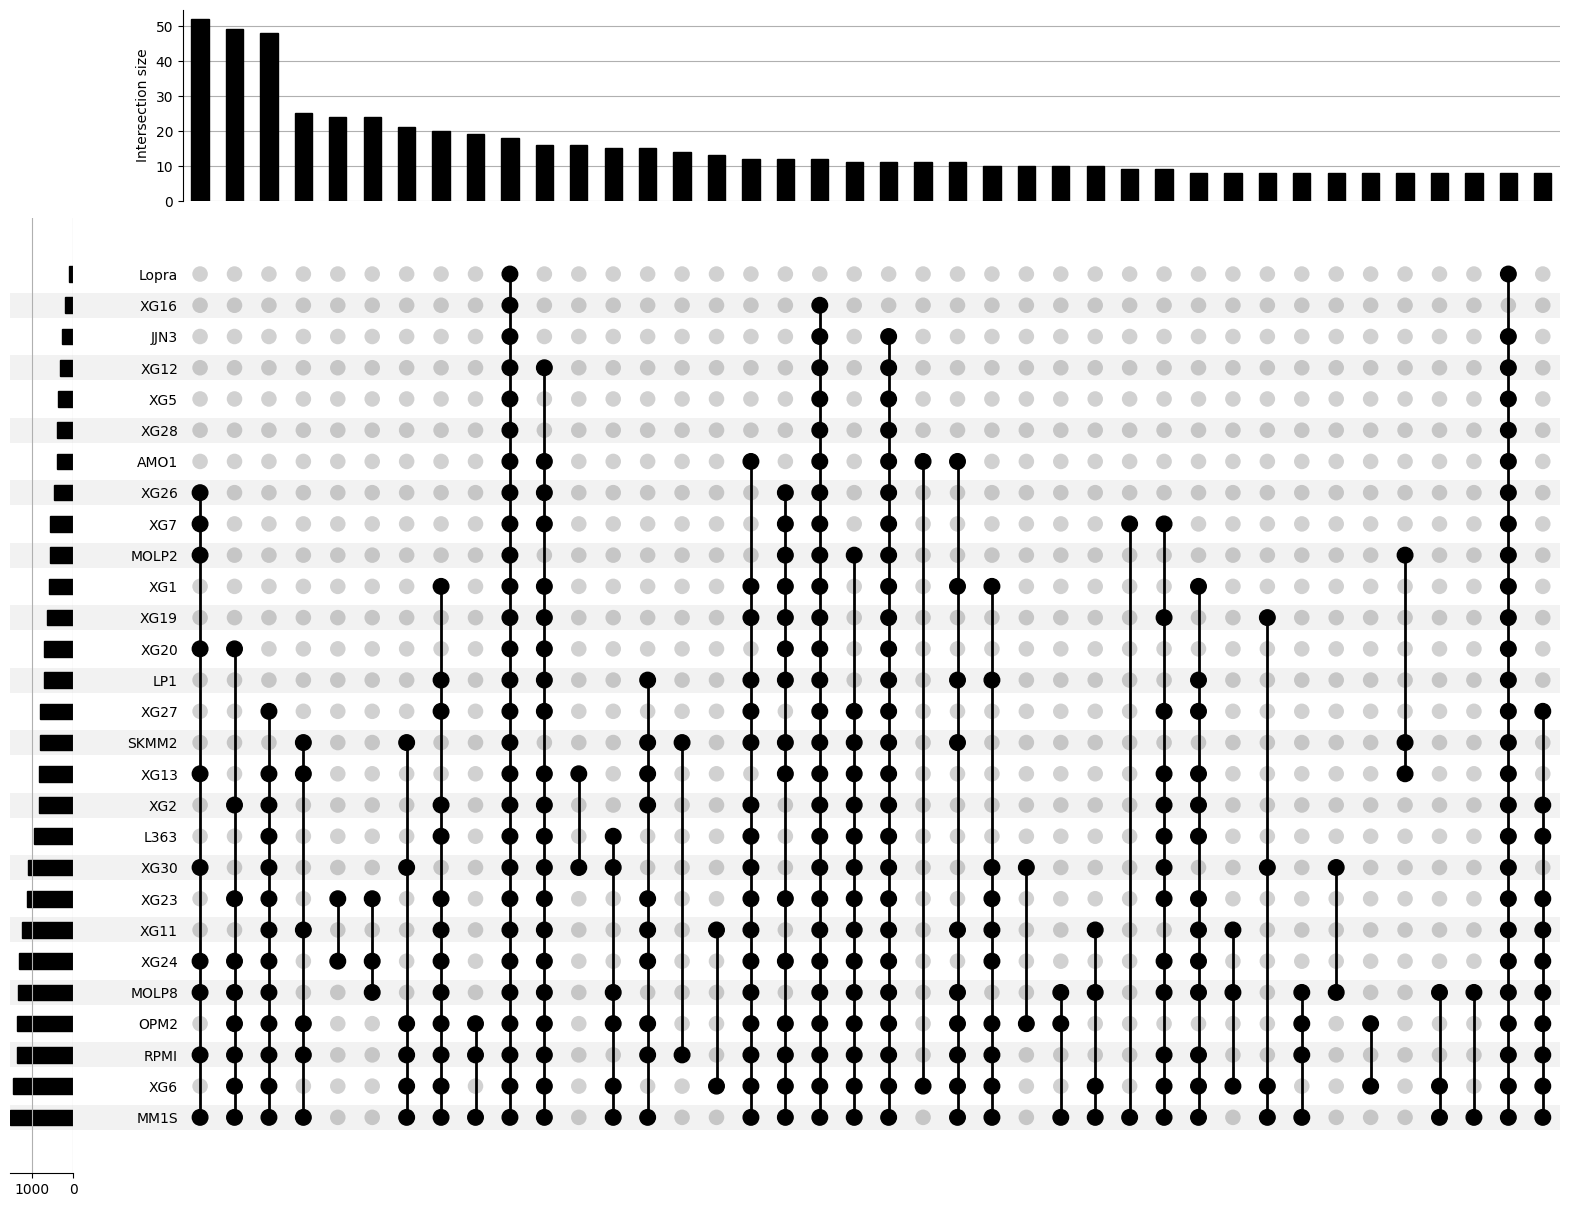

In [19]:

#a refaire
example = df_reduced.groupby(cell_lines[0:28]).size()
example.to_csv("test.csv")

#example = df_reduced.groupby(cell_lines).size()
print(example)
plot(example,max_subset_rank=30,sort_by='cardinality')
plt.show()



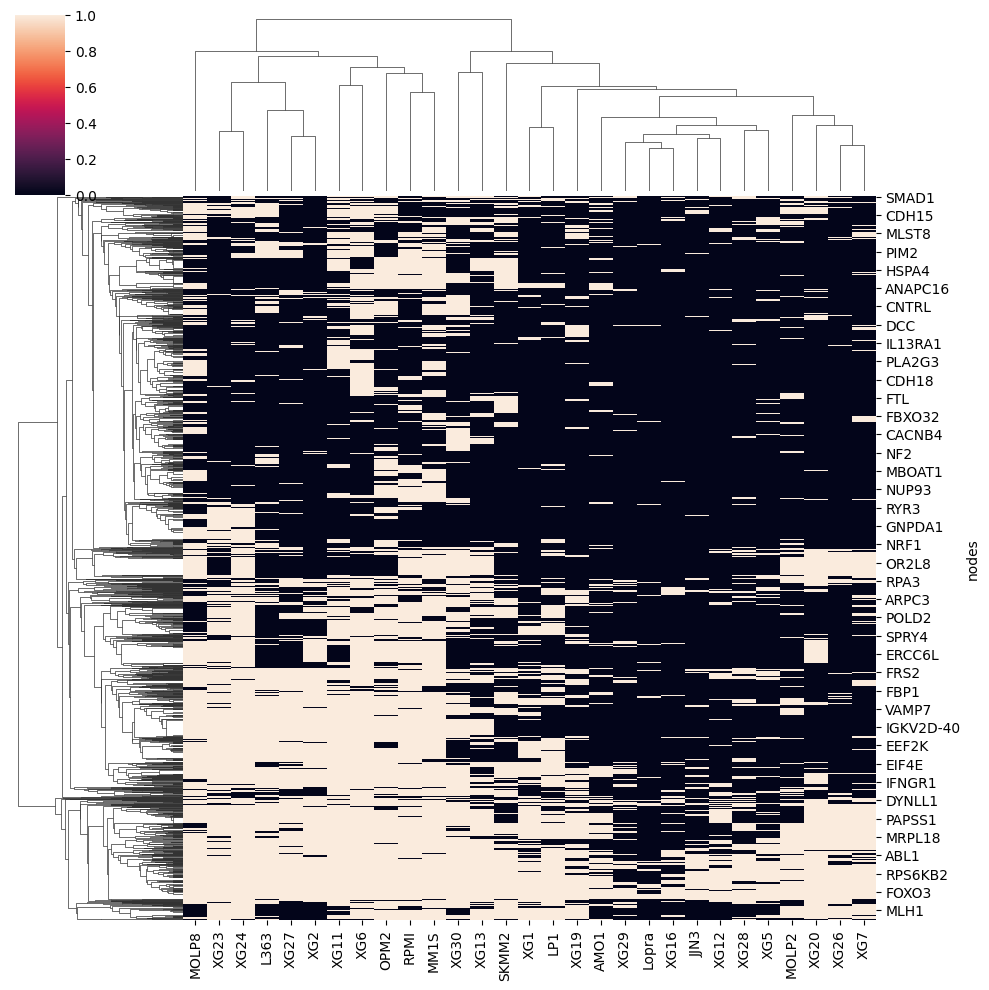

In [253]:
hierachic_cluster=sns.clustermap(df_reduced,xticklabels=True,metric='hamming',col_cluster=True)

Noeuds présents dans le groupe de gauche

In [296]:
df_clust1=hierachic_cluster.data2d
df_gauche=df_clust1.loc[:,'MOLP8':'SKMM2']
nb_occ_gauche=df_gauche.sum(axis=1).sort_values(ascending=False)
print(nb_occ_gauche)
nodes_gauche=nb_occ_gauche[nb_occ_gauche==len(df_gauche.columns)]
nodes_gauche.to_csv('left_present_nodes.csv')
print(nodes_gauche)

nodes
CYFIP2    14
UBTF      14
ARRB2     14
H2BC3     14
ARAF      14
          ..
CSF1R      0
MYLK4      0
RLN1       0
NCOA2      0
HSPA2      0
Length: 2214, dtype: int64
nodes
CYFIP2    14
UBTF      14
ARRB2     14
H2BC3     14
ARAF      14
          ..
PIK3CA    14
CAMK2G    14
PIK3CB    14
AKT1      14
PIK3R3    14
Length: 209, dtype: int64


In [297]:

df_droite=df_clust1.loc[:,'XG1':'XG7']
nb_occ_droite=df_droite.sum(axis=1).sort_values(ascending=False)
print(nb_occ_droite)
nodes_droite=nb_occ_droite[nb_occ_droite==0]
nodes_droite.to_csv('droite_present_nodes.csv')
print(nodes_droite)
 


nodes
NRAS      15
PIK3CD    15
CDC42     15
MYC       15
MAPK14    15
          ..
RFC1       0
DTX3       0
SNW1       0
DTX3L      0
FARP2      0
Length: 2214, dtype: int64
nodes
CCL3L1    0
PARP4     0
SPTBN2    0
IGHG4     0
LAT2      0
         ..
RFC1      0
DTX3      0
SNW1      0
DTX3L     0
FARP2     0
Length: 666, dtype: int64


In [86]:
hierachic_cluster.dendrogram_col.reordered_ind
df_clust=hierachic_cluster.data2d
print(df_clust)



        MOLP8  XG23  XG24  L363  XG27  XG2  XG11  XG6  OPM2  RPMI  ...  Lopra  \
nodes                                                              ...          
SMAD1       0     0     1     0     0    0     1    1     1     0  ...      0   
SMAD5       1     0     1     0     0    0     1    1     1     0  ...      0   
TGFBR2      0     0     1     0     0    0     0    0     1     0  ...      0   
TGFBR1      0     0     1     0     0    0     0    0     1     0  ...      0   
ERBB3       1     1     0     1     0    0     1    1     0     0  ...      1   
...       ...   ...   ...   ...   ...  ...   ...  ...   ...   ...  ...    ...   
BNIP3L      1     1     1     1     0    0     1    1     1     1  ...      0   
FANCD2      1     1     1     0     0    0     1    1     1     1  ...      0   
FANCI       1     1     1     0     0    0     1    1     1     1  ...      0   
SESN3       0     1     0     1     0    0     1    0     1     1  ...      0   
GP1BA       0     1     0   

In [22]:
df3[df3["occurence"] <2].to_csv('unique_nodes.csv')





<h1>Extract data for drugs</h1>

In [235]:
df_drugs=pd.read_csv('simplified_IC50.csv',sep="\t")  
print(df_drugs)

        HMCLs TRANSCRIPTOME MAS5 U133P RNAseq (Moreaux)  \
0         XG1                        x                x   
1         XG2                        x                x   
2         XG3                        x                x   
3         XG4                        x                x   
4         XG5                        x                x   
5         XG6                        x                x   
6         XG7                        x                x   
7        XG10                        x                x   
8        XG11                        x                x   
9        XG12                        x                x   
10       XG13                        x                x   
11       XG14                        x                x   
12       XG16                        x                x   
13       XG19                        x                x   
14       XG20                        x                x   
15       XG21                        x                x 

In [237]:
print(df_drugs.columns)
df_drugs=df_drugs[['HMCLs','MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 2 ','CDK inhibitor molecule 1']]
df_drugs.set_index('HMCLs', inplace=True)
df_drugs=df_drugs.transpose()



Index(['HMCLs', 'TRANSCRIPTOME MAS5 U133P', 'RNAseq (Moreaux)',
       'RNA SEQ CUFFLINKS 66HMCLS', 'Exome Seq', 'DNA METHYLATION',
       'MIRNA profiling', 'CHIPSEQ (6 marks)', 'MELPHALAN IC50 µM D4',
       'MELPHALAN', 'LENALIDOMIDE IC50 µM D4', 'Lenalidomide ',
       'POMALIDOMIDE IC50 nM D4', 'Pomalidomide', 'VELCADE IC50 nM D4',
       'Velcade', 'IXAZOMIB IC50 nM D4', 'Ixazomib',
       'DEXAMETHASONE IC50 µM D4', 'Dexamethasone ', 'DECITABINE IC50 µM D4',
       'DNMTi molecule 1', 'VIDAZA IC50 µM D4', 'DNMTi molecule 2',
       'TSA IC50 nM D4', 'HDACi molecule 1 ', 'Panobinostat IC50 nM D4',
       'HDACi molecule 2 ', 'Acide Valproic IC50 µM D4', 'HDACi molecule 3 ',
       'SAHA IC50 nM D4', 'HDACi molecule 4 ', 'Romidepsine IC50 nM D4',
       'HDACi molecule 5 ', 'ACY1215 / Ricolinostat (HDAC6i) IC50 µM D4',
       'HDACi molecule 6 ', 'AS602868 IC50 µM D4', 'IKK2 inhibitor',
       'JQ1 IC50 nM D4', 'BET inhibitor molecule 1', 'GSK525762 IC50 nM D4',
       'BET inhibi

In [239]:
print(df_drugs['Lopra'])

MELPHALAN                   NaN
Lenalidomide                NaN
Pomalidomide                  R
Velcade                       R
Ixazomib                    NaN
Dexamethasone               NaN
HDACi molecule 2            NaN
CDK inhibitor molecule 1    NaN
Name: Lopra, dtype: object


In [240]:
CL_interect=[]
CL_absent=[]
for CL in df.columns:  
    if CL in df_drugs.columns:        
        CL_interect.append(CL)
    else:
        CL_absent.append(CL)
print(CL_absent)
df_drugs=df_drugs[CL_interect]
print(df_drugs)   
melphalan=df_drugs.filter(items=['MELPHALAN'], axis=0)
melphalan=df_drugs.loc["MELPHALAN"]
print(melphalan)
print(df_drugs["XG2"])

[]
HMCLs                    XG30 XG11 OPM2 XG23 SKMM2 Lopra XG27 RPMI MOLP2 XG13  \
MELPHALAN                 NaN    I    I  NaN     S   NaN    I    R   NaN    R   
Lenalidomide                I    R    S  NaN     R   NaN    I    S   NaN    I   
Pomalidomide                R    R    I    R     I     R  NaN    I   NaN    I   
Velcade                     R    I    S    R     R     R  NaN    R     I    I   
Ixazomib                  NaN    R    S  NaN     I   NaN  NaN    I     I    I   
Dexamethasone             NaN    R    I  NaN   NaN   NaN  NaN  NaN   NaN  NaN   
HDACi molecule 2          NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN   NaN    S   
CDK inhibitor molecule 1  NaN    S    I  NaN   NaN   NaN  NaN    I   NaN    I   

HMCLs                     ...  XG2 AMO1 XG16 XG12 XG7  XG6  LP1 XG20  XG5 XG29  
MELPHALAN                 ...    S    R    I    I   I    S    I    R    R    S  
Lenalidomide              ...    I    R    S    R   R    I    I    R    R  NaN  
Pomalidomide            

In [252]:
def add_drug(drug):
    series_drug=df_drugs.loc[drug]
    lut = dict(zip(["R","I","nan","S"], "rbwg"))
    col_colors = series_drug.map(lut)
    sns.clustermap(df_reduced, col_colors=col_colors,metric='hamming')
    
    handles = [Patch(facecolor=lut[name]) for name in lut]
    plt.legend(handles, lut, title='Species',
               bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

    #extract all nodes specific to sensitive CL
    S_CL=series_drug[series_drug=='S'].index
    net_S=df_reduced[S_CL]
    nb_occ_S=net_S.sum(axis=1).sort_values(ascending=False)
    nodes_S=nb_occ_S[nb_occ_S==len(S_CL)]

    R_CL=series_drug[series_drug=='R'].index
    net_R=df_reduced[R_CL]
    nb_occ_R=net_R.sum(axis=1).sort_values(ascending=False)
    nodes_R=nb_occ_R[nb_occ_R==len(R_CL)]
    #print(nodes_R)
    #print(len(nodes_S))
    common_nodes= ((nodes_R.index.intersection(nodes_S.index)))
    print(nodes_S.drop(common_nodes).to_string())
    print(nodes_S.drop(common_nodes).size)
    nodes_S.drop(common_nodes).to_csv("drug_nodes/"+drug+"_S_nodes.csv")

    #extract all nodes specific for resistant cells
    R_CL=series_drug[series_drug=='R'].index
    net_R=df_reduced[R_CL]
    nb_occ_R=net_R.sum(axis=1).sort_values(ascending=False)
    nodes_R=nb_occ_R[nb_occ_R==len(R_CL)]

    S_CL=series_drug[series_drug=='S'].index
    net_S=df_reduced[S_CL]
    nb_occ_S=net_S.sum(axis=1).sort_values(ascending=False)
    nodes_S=nb_occ_S[nb_occ_S==len(S_CL)]
    #print(nodes_R)
    #print(len(nodes_S))
    common_nodes= ((nodes_S.index.intersection(nodes_R.index)))
    print(nodes_R.drop(common_nodes).to_string())
    print(nodes_R.drop(common_nodes).size)
    nodes_R.drop(common_nodes).to_csv("drug_nodes/"+drug+"_R_nodes.csv")
    
    
w=ipywidgets.interact(add_drug,drug=widgets.RadioButtons(
    options=['MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 2 ','CDK inhibitor molecule 1'],
   value='MELPHALAN',
    description='Choose drug to display:',
    disabled=False
))


interactive(children=(RadioButtons(description='Choose drug to display:', options=('MELPHALAN', 'Lenalidomide …

<H1>Etudes des caractéristiques des graphes - extraction des noeuds des réseaux</H1>

In [ ]:
df=df[['HMCLs','MELPHALAN','Lenalidomide ','Pomalidomide','Velcade','Ixazomib','Dexamethasone ','HDACi molecule 2 ']]
df.set_index('HMCLs', inplace=True)


In [6]:
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"

df_betweeness=df.replace(0, np.nan, inplace=False)
df_betweenessbis=df.replace(0, np.nan, inplace=False)
df_outdegree=df.replace(0, np.nan, inplace=False)
df_indegree=df.replace(0, np.nan, inplace=False)
for f in listdir(input_folder):
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_edges.tsv"
    interaction=near_shortest_undirected.load_full_graph_unweihted(file_name)
    G=near_shortest_undirected.load_interactions_unweighted (interaction) #return a digraph
    Gbis=nx.to_undirected(G)
    centrality=nx.betweenness_centrality(G)
    centralitybis=nx.betweenness_centrality(Gbis)
    outdegree=G.out_degree()
    indegree=G.in_degree()
    values=list(centrality.values())
    valuesbis=list(centralitybis.values())
    for key in centrality.keys():
        
        df_betweeness.loc[df_betweeness.index==uni_to_name[key], f]=centrality[key]
        df_outdegree.loc[df_outdegree.index==uni_to_name[key], f]=outdegree[key]
        df_indegree.loc[df_indegree.index==uni_to_name[key], f]=indegree[key]
        df_betweenessbis.loc[df_betweeness.index==uni_to_name[key], f]=centralitybis[key]
    file.close()   






print(max(values)+5/100*max(values))
#print(np.percentile(np.array(values),70,method='higher'))

0.16354165846575752


ValueError: The condensed distance matrix must contain only finite values.

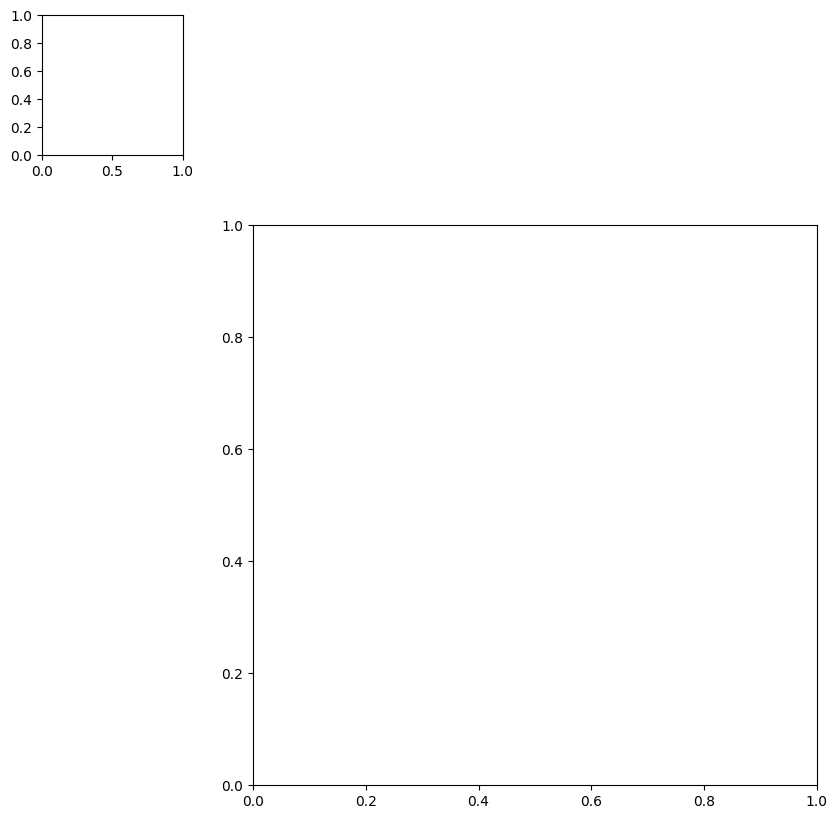

In [7]:
hierachic_cluster=sns.clustermap(df_betweeness,xticklabels=True,col_cluster=True)

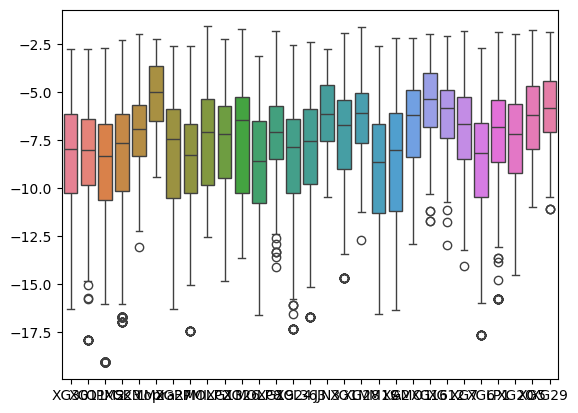

In [10]:
df_betweeness.nlargest(50,columns="Lopra")['Lopra']
df_betweeness[df_betweeness == 0] = np.nan
sns.boxplot(np.log(df_betweeness))
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [ ]:
for CL in df_betweeness.columns:
    #np.log(df_betweeness[CL]).hist()
    sns.displot(np.log(df_betweeness[CL]),kind="kde")
    plt.show
    values=np.array(np.log(df_betweeness[CL]))

    
    
    print(CL)
    stat=scipy.stats.normaltest(values,nan_policy='omit')
    
    print(stat)
    print(stat.pvalue)

    
    

In [ ]:

betweness_set=set()
degree_set=set()
indegree_set=set()
betweness_set=df_betweeness[df_betweeness["XG30"]==0].index
degree_set=df_outdegree[df_outdegree["XG30"]==0].index
indegree_set=df_indegree[df_indegree["XG30"]==0].index
print(len(degree_set))
print(len(indegree_set))
print(len(betweness_set))
print(degree_set.intersection(betweness_set))
print(len(indegree_set.intersection(betweness_set)))


In [ ]:
df_betweeness['XG30'].sort_values()

In [ ]:
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"
df_degree=df.astype(float)
for f in listdir(input_folder):
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_edges.tsv"
    interaction=near_shortest_undirected.load_full_graph_unweihted(file_name)
    G=near_shortest_undirected.load_interactions_unweighted (interaction)
    
    degrees=nx.degree(G)
    
    for degree in degrees:
        
        df_degree.loc[df_degree.index==uni_to_name[degree[0]], f]=degree[1]

    file.close()   

In [ ]:
df_degree.nlargest(50,columns="Lopra")['Lopra']
df_degree[df_degree == 0] = np.nan
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(np.log(df_degree))

plt.show()

In [ ]:
for CL in df_degree.columns:
    #np.log(df_betweeness[CL]).hist()
    sns.displot(np.log(df_degree[CL]),kind="kde")
    values=np.array(np.log(df_degree[CL]))
    print(CL)
    stat=scipy.stats.normaltest(values,nan_policy='omit')
    print(stat)
    print(stat.pvalue)